# Observed Taylor law with a contour plot. That is bivariate distributions by groups of organisms in the Taylor: 
**mean vs variance**  
In protein coding gene length distributions for the different species

Bivariate distributions within the Taylor

## Import python modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import pandas as pd
import numpy as np
import sys


from plotnine import *
import warnings
warnings.filterwarnings('ignore')

BOOL_SAVE_FIG = 0
PROJECT_ROOT = "../../../"
OUTPUT_PATH = PROJECT_ROOT + "working_on_plots/working_on/analysis/receptors_peak__distr_logL/"

## Retrieving the statistical descriptions of the gene length's distributions for the different genomes

In [2]:
# statistics on length distribution for different species
working_on_extra_path = "../../../main_work/"
stat_file = working_on_extra_path + "../main_tables/stat_protCodGenes.tsv"
print("The statistical descriptions of the protein coding gene distributions for the different species is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["division_7", "division_8", "species", "trunk_genes_path", "genes_file", "count", "mean", "var"]] 

# visualize data
pd.set_option('display.max_columns', None)
if 1:
    display(stat_df.head(2))
    print(stat_df.shape)

The statistical descriptions of the protein coding gene distributions for the different species is in:
 ../../../main_work/../main_tables/stat_protCodGenes.tsv 



,division_7,division_8,species,trunk_genes_path,genes_file,count,mean,var
0,bacteria,archaea,methanobacterium_bryantii_gca_002287175,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_bryantii...,3168,840.404040,422343.848699
1,bacteria,archaea,methanobacterium_formicicum_gca_000762265,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.methanobacterium_formicic...,2352,862.427296,347239.612747


(33627, 8)


## Python functions

In [3]:
# species' stats for length distribution
def get_df_for_taxid(df, taxid):
     return df.loc[df["tax_id"]==taxid].copy()

In [4]:
def plot_taylor (df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression): 
    #Calculate best fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    #Format the regression text
    if 0: 
        print("v = {:4.4} * m^{:4.4};   R^2= {:2.4f}".format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.2} '.format(10**intercept)  + ' \t ' + '\mu^{' + '{:4.3}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.2f}$'.format(r_value**2)
    else:
        txt = ''
        
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.1) +
        geom_smooth(method="lm", color="green", size=0.25, span=.8)+
        labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=['#D83B01', '#002050', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']) # + scale_color_brewer() '#5C2D91'
        + labs(color='Clade') # legend title
        + scale_x_log10(breaks=[10 ** power for power in range(6)],
          limits=[min(df2plot[col_x].to_list())/2, 2*max(df2plot[col_x].to_list())]) 
        + scale_y_log10(breaks = [10**power for power in range(13)], 
          limits = [min(df2plot[col_y].to_list())/2,2*max(df2plot[col_y].to_list())])#, labels=scientific_format(digits=2)
    ) + theme(legend_position=(0.75,0.25), legend_key_size=5, legend_background=element_rect(fill='grey', alpha=0.01)) + annotate('text', x=0.015*max(df2plot[col_x].to_list()), y=0.65*max(df2plot[col_y].to_list()), label=txt,size=9,color="black")
    print(p)

#### Filter some species

In [5]:
if 0:
    print(stat_df["division_8"].value_counts())
def filter_nan_in_division8(df):    
    cond = df["division_8"].isin(["bacteria", "archaea","protists", "plants", "fungi", "metazoa", "vertebrates"])  # avoid: empty or viruses
    df = df[cond]
    return df

def filter_species_mus_caroli(df):  #outlier...should not go out  
     return df[df["species"] != "mus_caroli"]

if 0:
    print(stat_df.shape)
    print(stat_df["division_8"].value_counts())

## Observations: variance vs. mean (represented in $log_{10}$ scale)
## Protein coding gene length distributions  
$\sigma^{2}$ is the variance   
$\mu$ is the mean  

### All protein coding genes from the paper (33,627)
incluyendo 168 entradas de division_7 que se pierden al hacer el label division_8.

(33627, 8)
division_8
bacteria       30555
archaea         1228
fungi           1007
protists         237
vertebrates      221
NaN              168
metazoa          115
plants            96
Name: count, dtype: int64


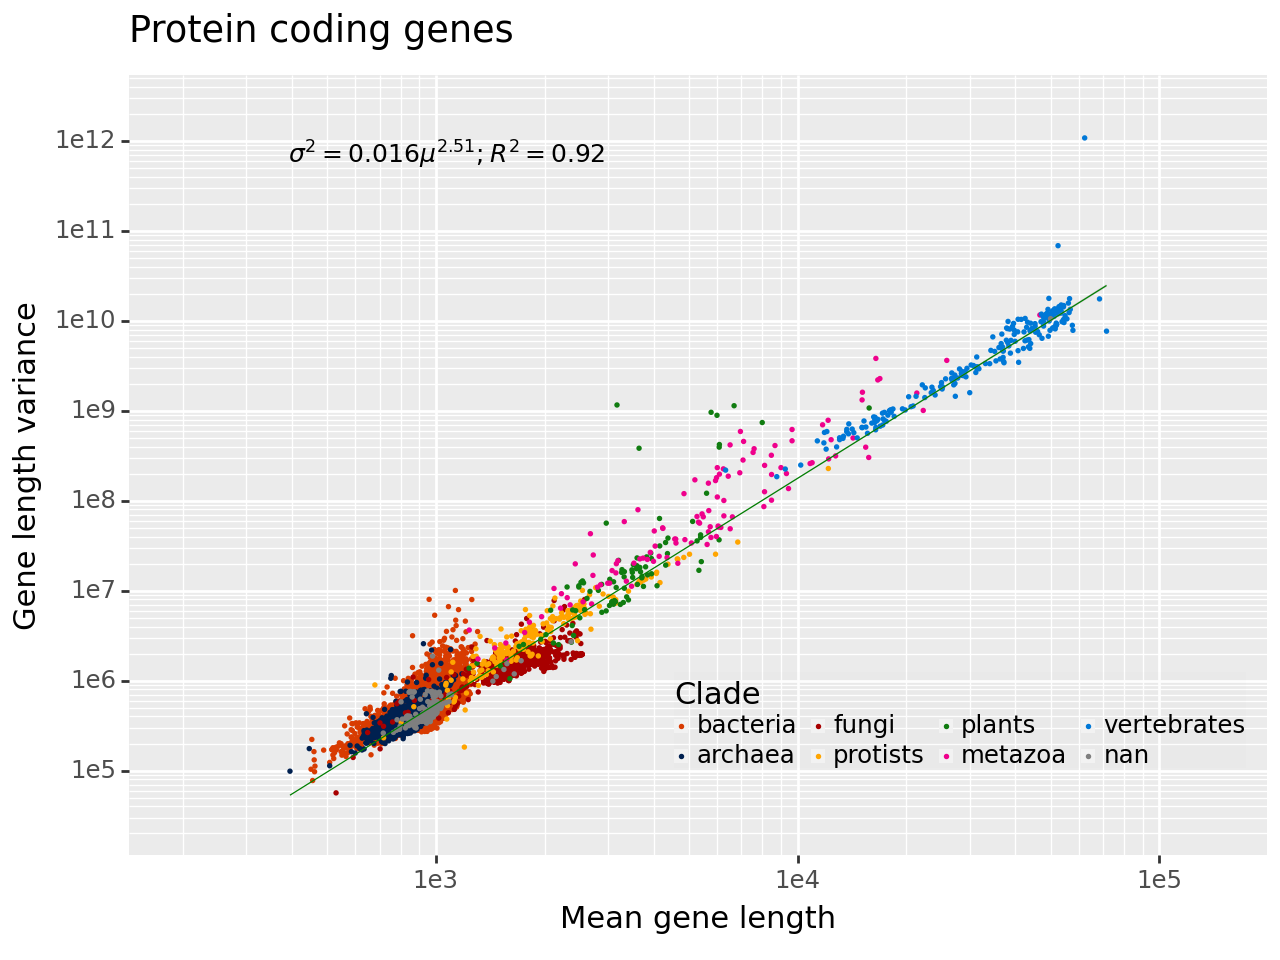

In [6]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_8"

title = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Gene length variance"
bool_show_regression = True

df2plot = stat_df.copy()
if 1:
    print(df2plot.shape)
    print(df2plot['division_8'].value_counts(dropna=False))
# Sort division_8 in order to plot the clades in an order (everything can be displayed)
if 0:
    print(df2plot.division_8.unique())
df2plot.division_8 = pd.Categorical(df2plot.division_8, 
                                categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values('division_8', inplace=True)

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

#### Note:  
$\sigma^{2} = a . \mu^{\beta}$   
Because the regression line is:  
$\log(\sigma^{2}) = \log(a) + \beta log(\mu) $

### Protein coding genes (33,459)
excluyendo 168 entradas del conjunto total de 33,627. Son entradas de division_7 que se pierden al hacer el label division_8.

(33459, 8)
division_8
bacteria       30555
archaea         1228
fungi           1007
protists         237
vertebrates      221
metazoa          115
plants            96
Name: count, dtype: int64


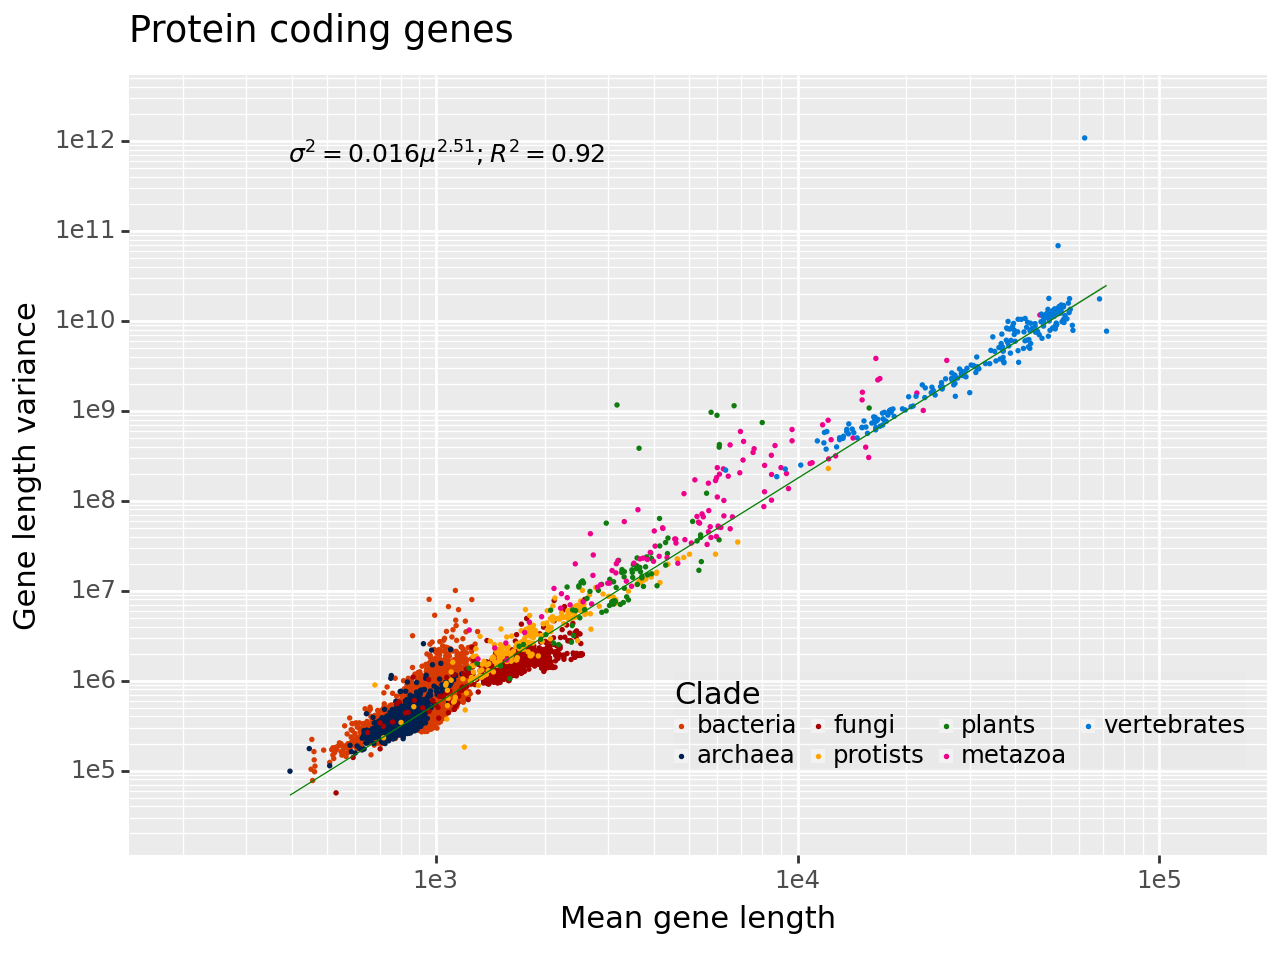

In [7]:
df2plot = stat_df.copy()
df2plot = filter_nan_in_division8(df2plot)
if 0:
    df2plot = filter_species_mus_caroli(df2plot) # puedo filtrar tb. mus. caroli, si quiero, como sugería Fer en el paper

if 1:
    print(df2plot.shape)
    print(df2plot['division_8'].value_counts(dropna=False))
    
# Sort division_8 in order to plot the clades in an order (everything can be displayed)
# perhaps transparency to protist will solve the visualization problem
if 0:
    print(df2plot.division_8.unique())
df2plot.division_8 = pd.Categorical(df2plot.division_8, 
                                categories=['bacteria', 'archaea', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot.sort_values('division_8', inplace=True)

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

### Protein coding genes (contour plot) 

In [8]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "division_8"
#
title_template = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Counts"
#
#
Lg_df = stat_df.copy()
Lg_df = Lg_df[['division_7', 'division_8', "species", 'mean', 'var']] # [['division_7', 'division_8', 'species', 'trunk_genes_path', 'genes_file', 'count', 'mean', 'var']]

# sort by groups of organisms
Lg_df["division_7"] = pd.Categorical(Lg_df["division_7"], 
                                  categories=['bacteria', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                  ordered=True)
# sort by groups of organisms
Lg_df["division_8"] = pd.Categorical(Lg_df["division_8"], 
                                  categories=['archaea','bacteria', 'fungi', 'protists', 'plants', 'metazoa', 'vertebrates'],
                                  ordered=True)
Lg_df.sort_values(legends_by, inplace=True)



display(Lg_df.head(1))
if 1:
    print(Lg_df.shape)
    print(Lg_df.division_8.value_counts(dropna=False, normalize=False))
df = Lg_df
df = filter_species_mus_caroli(df)
##df = df[ (df["division_7"] == "fungi")  | (df["division_7"] == "protists")]
##df = df[ (df["division_7"] == "bacteria") | (df["division_7"] == "fungi")    | (df["division_7"] == "protists")]
###df = df[ (df["division_8"] == "bacteria") | (df["division_8"] == "archaea") | (df["division_8"] == "fungi")  | (df["division_8"] == "protists")]
df["log10_mean"] = np.log10(df["mean"])
df["log10_var"]  = np.log10(df["var"])

##display(df)




,division_7,division_8,species,mean,var
0,bacteria,archaea,methanobacterium_bryantii_gca_002287175,840.40404,422343.848699


(33627, 5)
division_8
bacteria       30555
archaea         1228
fungi           1007
protists         237
vertebrates      221
NaN              168
metazoa          115
plants            96
Name: count, dtype: int64


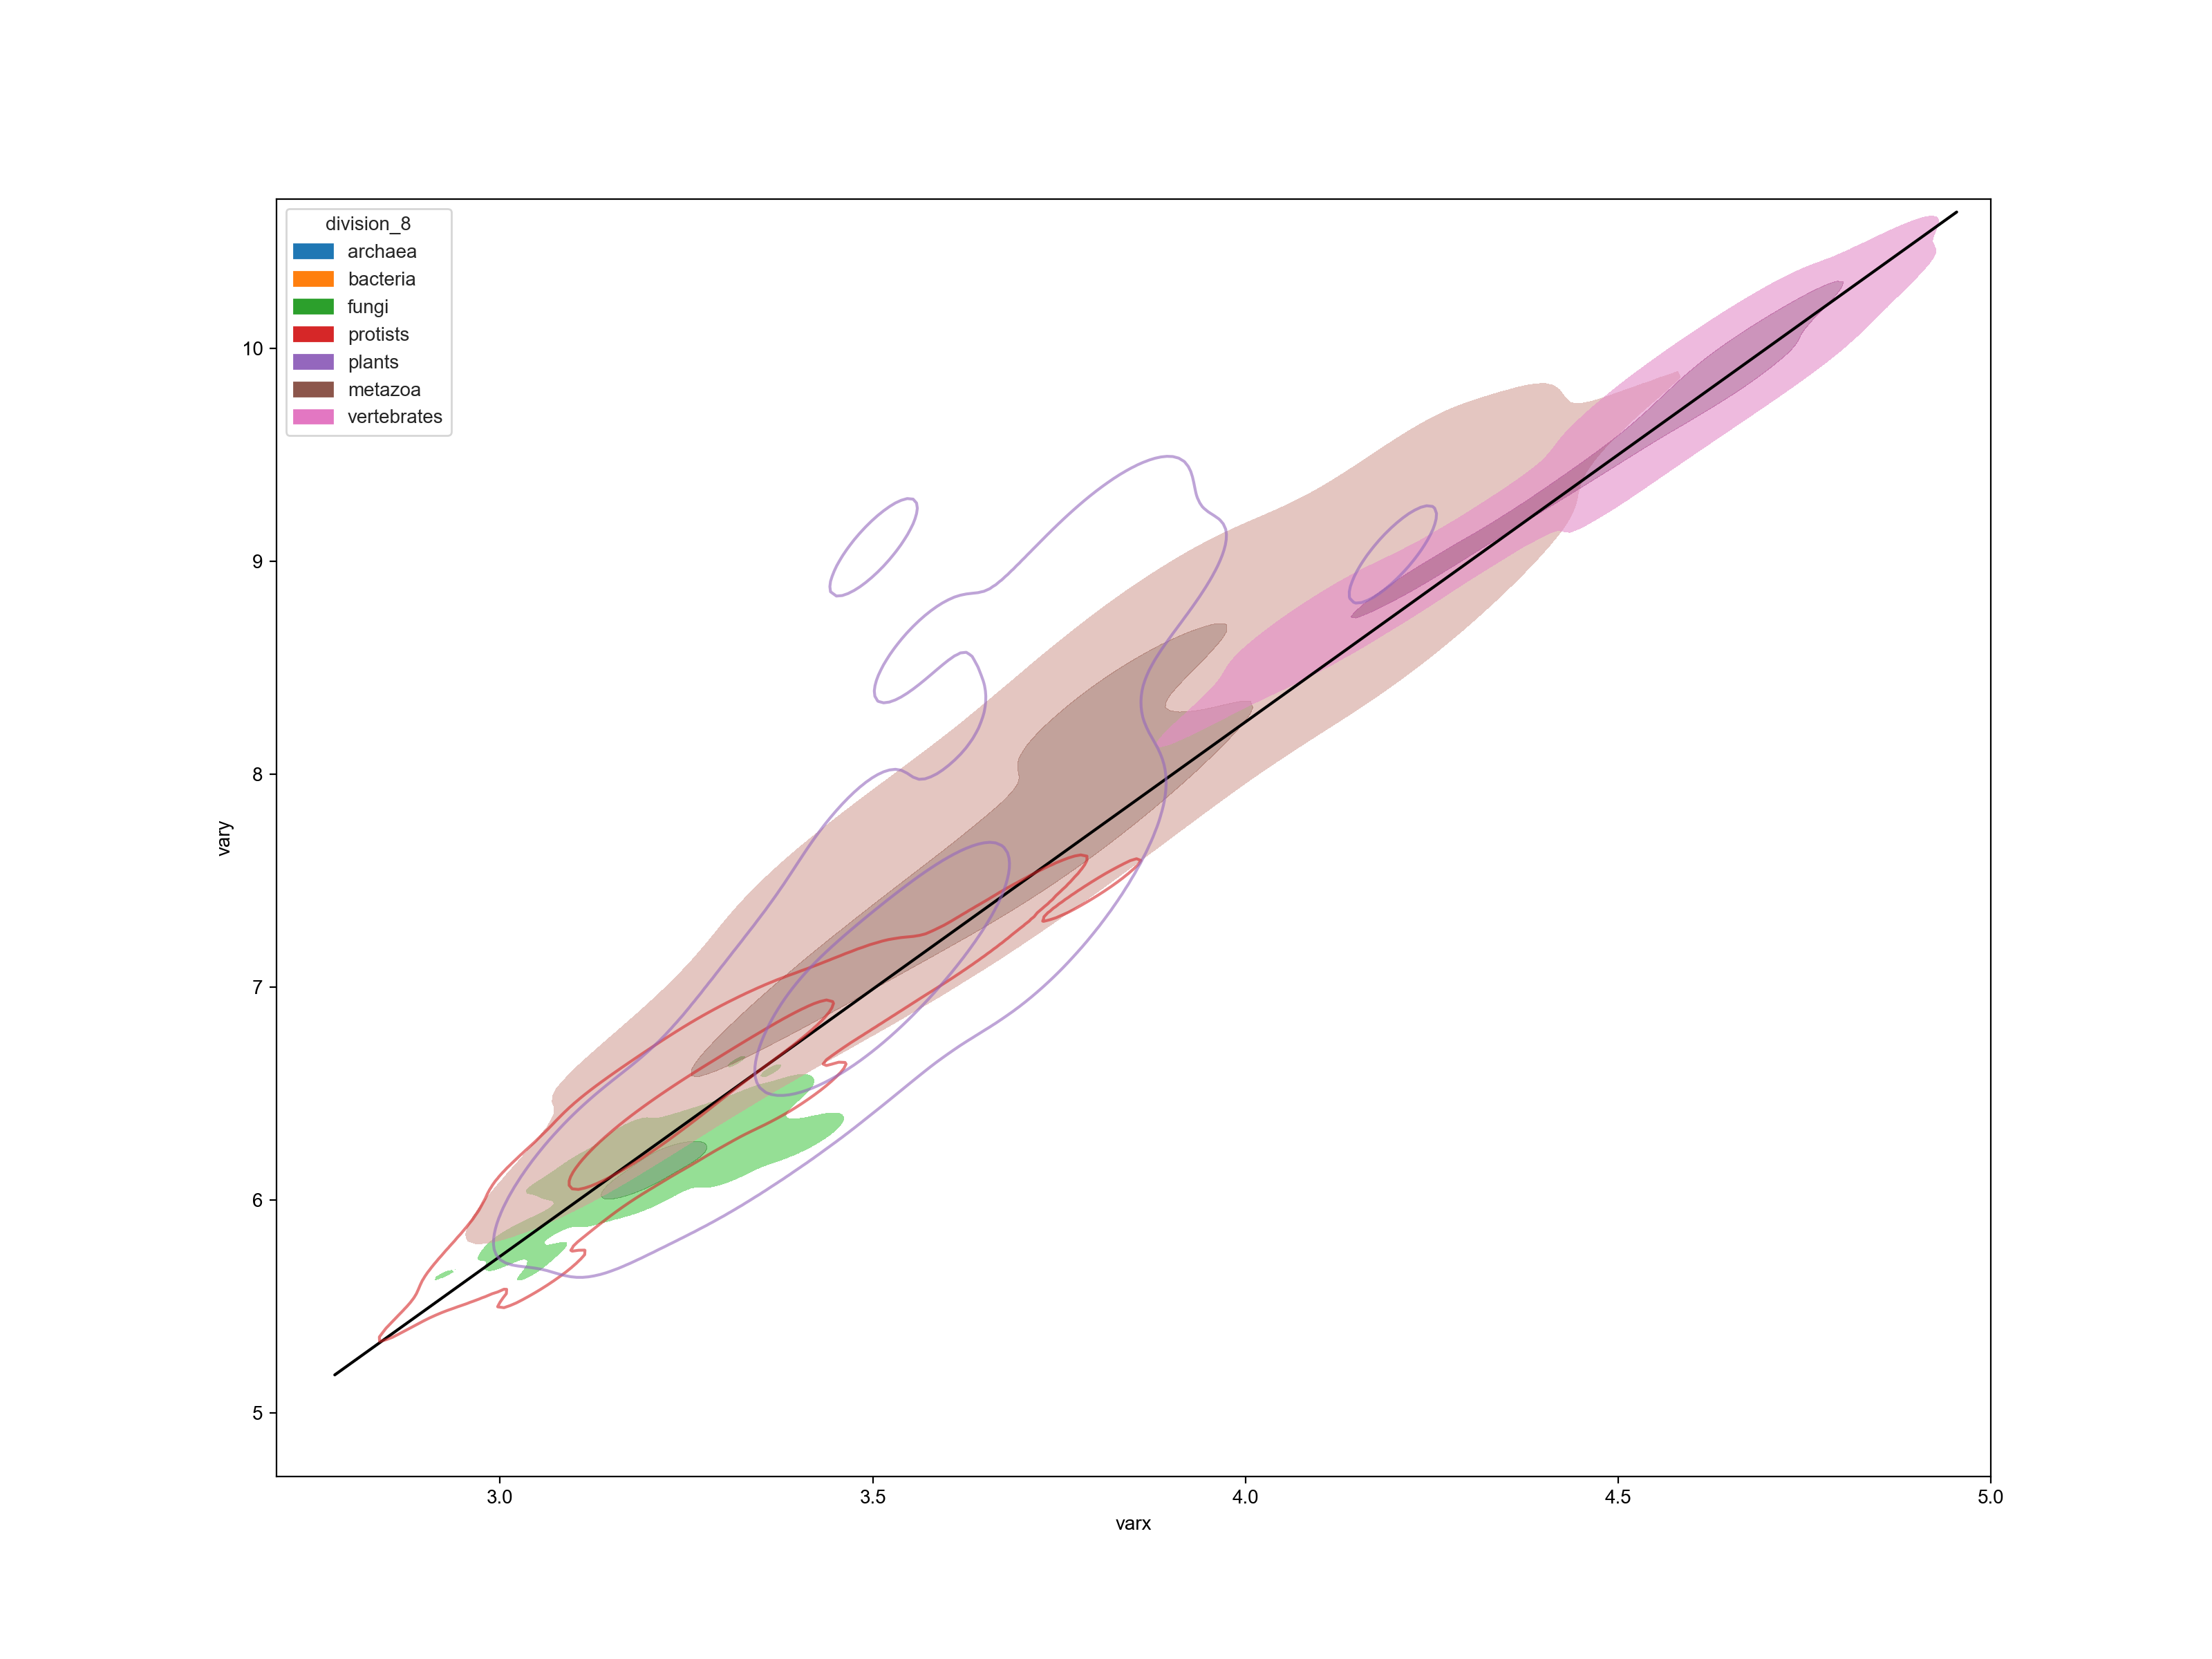

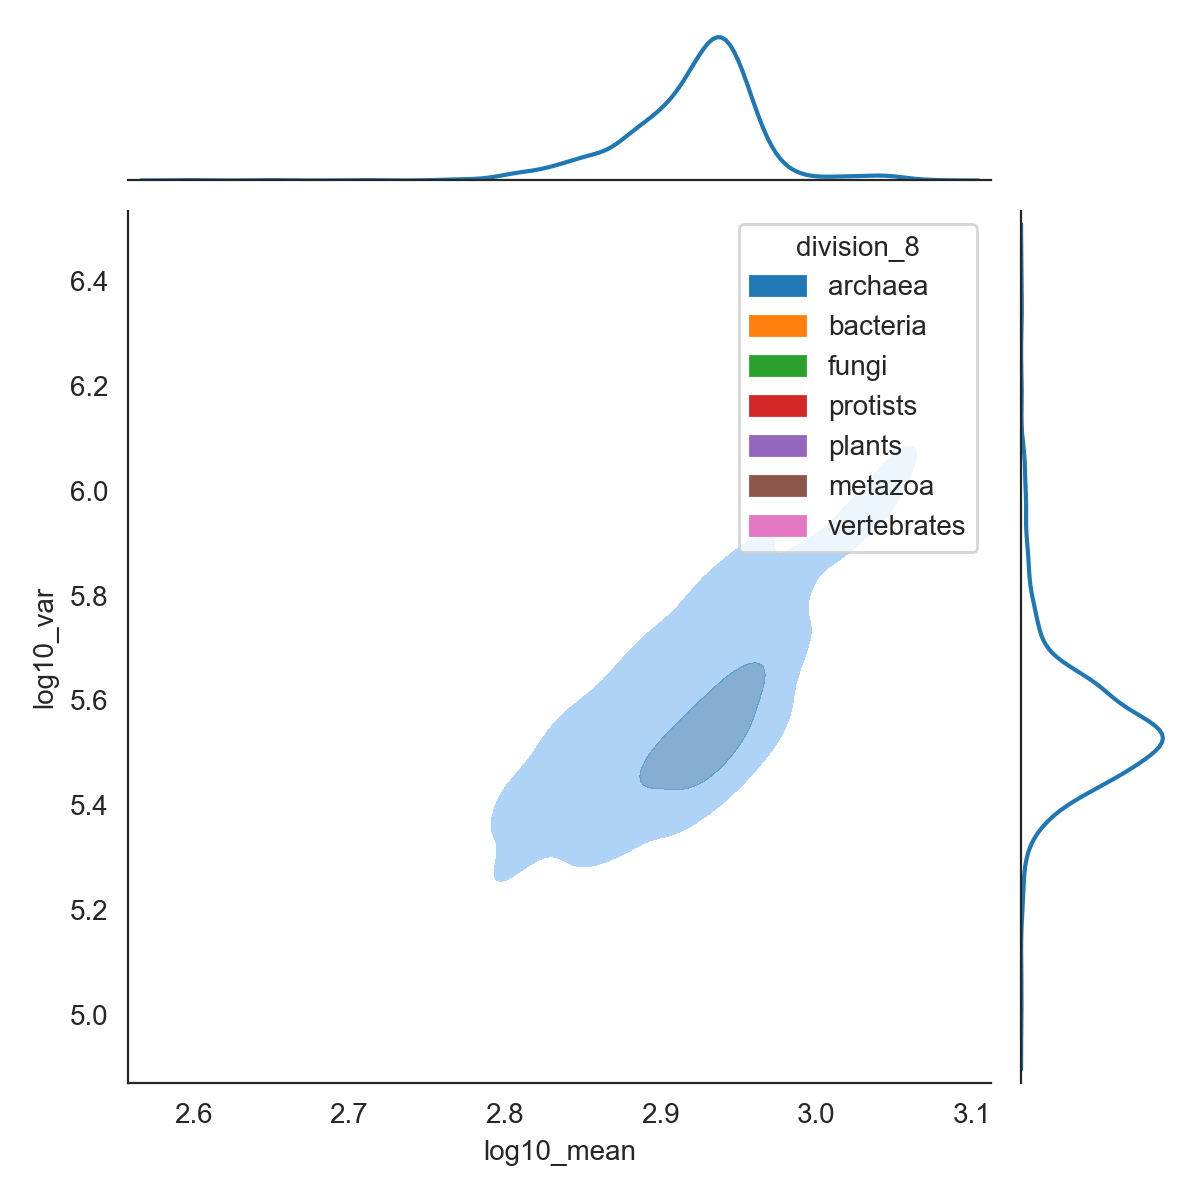

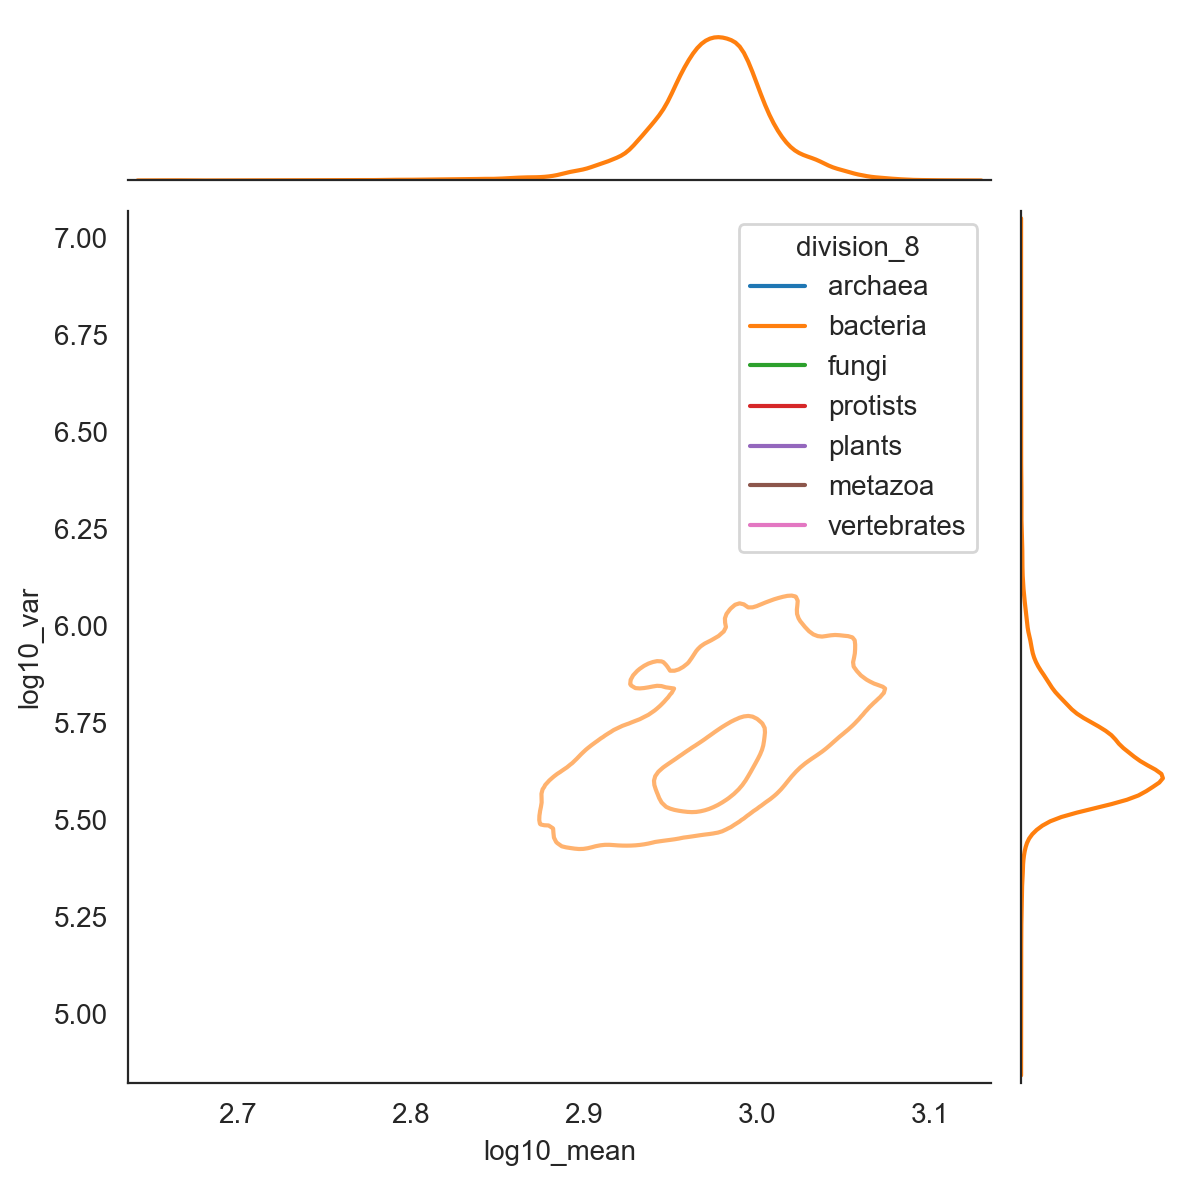

In [9]:
filter_by = legends_by

# set seaborn style
fig, ax = plt.subplots(figsize=(16, 12))
sns.set_style("white")


if 1: # REGRESSION LINE FROM TAYLOR
    mu_s = 600	 # archaea
    mu_e = 90000.
    def t(x):
        return np.log10(0.016 * x**2.51)
    varx = [np.log10(mu_s), np.log10(mu_e)]
    vary = [t(mu_s), t(mu_e)]
    regression_df = pd.DataFrame({"varx":varx, "vary":vary})
    sns.lineplot(x = "varx", y = "vary", data=regression_df, color="black")
   
if 1: # archaea
    df_a = df[ (df[filter_by] == "archaea")]    
    df_a = df_a.sort_values(by="log10_mean")
    if 0:
        display(df_a)
        df_a = df_a.sort_values(by="log10_var")
        display(df_a)
    sns.jointplot(data=df_a, x="log10_mean", y="log10_var", hue=filter_by, shade=True, alpha=0.6, ax=ax, levels=3,kind="kde")
    if 0:
        ax.set_xlim(2.55, 3.1)   
        ax.set_ylim(4.9, 6.5)

if 1: # bacteria
    df_b = df[ (df[filter_by] == "bacteria")]    
    df_b = df_b.sort_values(by="log10_mean")
    if 0:
        display(df_b)
        df_b = df_b.sort_values(by="log10_var")
        display(df_b)
    sns.jointplot(data=df_b, x="log10_mean", y="log10_var", hue=filter_by, shade=False, alpha=0.6, ax=ax, levels=3, kind="kde")
    if 0:
        ax.set_xlim(2.6, 3.1)   
        ax.set_ylim(4.8, 7.)

if 1: # protists
    df_p = df[ (df[filter_by] == "protists")]
    df_p = df_p.sort_values(by="log10_mean")
    if 0:
        display(df_p)
        df_p = df_p.sort_values(by="log10_var")
        display(df_p)
    sns.kdeplot(data=df_p, x="log10_mean", y="log10_var", hue=filter_by, shade=False, alpha=0.6, ax=ax, levels=3)
    if 0:
        ax.set_xlim(2.8, 4.1)
        ax.set_ylim(5.2, 8.4)       

if 1: # fungi
    df_f = df[ (df[filter_by] == "fungi") ]
    df_f = df_f.sort_values(by="log10_mean")
    if 0:
        display(df_f)
        df_f = df_f.sort_values(by="log10_var")
        display(df_f)
    sns.kdeplot(data=df_f, x="log10_mean", y="log10_var", hue=filter_by, shade=True, alpha=0.6, ax=ax, levels=3)
    if 0:
        ax.set_xlim(2.7, 3.5)
        ax.set_ylim(4.7, 7.)


if 1: # plants
    df_p = df[ (df[filter_by] == "plants") ]
    df_p = df_p.sort_values(by="log10_mean")
    if 0:
        display(df_p)
        df_p = df_p.sort_values(by="log10_var")
        display(df_p)
    sns.kdeplot(data=df_p, x="log10_mean", y="log10_var", hue=filter_by, shade=False, alpha=0.6, ax=ax, levels=3)
    if 0:
        ax.set_xlim(3.0, 4.4)
        ax.set_ylim(6., 9.5)


if 1: # metazoa
    df_m = df[ (df[filter_by] == "metazoa") ]
    df_m = df_m.sort_values(by="log10_mean")
    if 0:
        display(df_m)
        df_m = df_m.sort_values(by="log10_var")
        display(df_m)
    sns.kdeplot(data=df_m, x="log10_mean", y="log10_var", hue=filter_by, shade=True, alpha=0.6, ax=ax, levels=3)
    if 0:
        ax.set_xlim(3.0, 5)
        ax.set_ylim(4.6, 7.)

if 1: # vertebrata
    df_v = df[ (df[filter_by] == "vertebrates") ]
    df_v = df_v.sort_values(by="log10_mean")
    if 0:
        display(df_v)
        df_v = df_v.sort_values(by="log10_var")
        display(df_v)
    sns.kdeplot(data=df_v, x="log10_mean", y="log10_var", hue=filter_by, shade=True, alpha=0.6, ax=ax, levels=3)
    if 0:
        ax.set_xlim(3.0, 5)
        ax.set_ylim(4.6, 7.)

if 1:
    if 0:
        ax.set_xlim(2.55, 3.1) # bact, arch
        ax.set_ylim(4.8, 7.)
    if 0:  # bact, arch, fungi
        ax.set_xlim(2.55, 3.5)    
        ax.set_ylim(4.7, 7.)
    if 0:  # bact, arch, fungi, protists
        ax.set_xlim(2.55, 4.1)    
        ax.set_ylim(4.7, 8.4)
    if 0: # fungi y protists
        ax.set_xlim(2.7, 4.1)
        ax.set_ylim(4.8, 8.4)
    if 0: # bact, arch, fungi, protists, plants
        ax.set_xlim(2.7, 4.4)
        ax.set_ylim(4.7, 9.5)
    if 0: # bact, arch, fungi, protists, plants, metazoa
        ax.set_xlim(2.7, 4.7)
        ax.set_ylim(4.7, 10.1)
    if 1: # bact, arch, fungi, protists, plants, metazoa, vertebrates
        ax.set_xlim(2.7, 5.)
        ax.set_ylim(4.7, 10.7)

contour_f = OUTPUT_PATH + "protCodGenes_taylorlaw" + "_contour_and_density.png"
if BOOL_SAVE_FIG:
    plt.savefig(contour_f)
plt.show()